Primero defino el mapeo de Hénon:

In [1]:
using Plots, LaTeXStrings
pyplot(markerstrokecolor=false)

Plots.PyPlotBackend()

In [2]:
function Henon(x, y, a, b)
    
    1 - a*x^2 + y , b*x
    
end 

Henon (generic function with 1 method)

In [3]:
r, t = Henon(0, 0, 1.4, 0.3)

(1.0,0.0)

In [4]:
xs = []
ys = []
dentro_circulo = 0
total = 0

for i in 1:10000000
    
    x, y = rand(2)
    r = sqrt(x^2 + y^2)
    total += 1
    
    if r < 1
        
        dentro_circulo += 1
        push!(xs, x)
        push!(ys,y)
    
    end
    
end
   
dentro_circulo, total

(7853260,10000000)

In [5]:
circulo = zeros(2, length(xs))
circulo[1, :] = xs
circulo[2, :] = ys
circulo

2×7853260 Array{Float64,2}:
 0.316887  0.0567334  0.753791  0.214011  …  0.745203  0.527448  0.367017 
 0.713862  0.414841   0.198231  0.258006     0.503008  0.428149  0.0583164

In [6]:
circulo

2×7853260 Array{Float64,2}:
 0.316887  0.0567334  0.753791  0.214011  …  0.745203  0.527448  0.367017 
 0.713862  0.414841   0.198231  0.258006     0.503008  0.428149  0.0583164

In [12]:
(dentro_circulo/total )*4

3.141304

In [26]:
function condiones_iniciales_2D(f::Function, t_range)
    CI = zeros(2, length(t_range))
    
    for i in 1:length(t_range)
        
        CI[1, i] = f(t_range[i])[1]
        CI[2, i] = f(t_range[i])[2]
        
    end
    
    CI
    
end

condiones_iniciales_2D (generic function with 1 method)

In [41]:
σ(t) = cos(t), sin(t)

σ (generic function with 1 method)

In [37]:
methods(|>)

# 1 method for generic function "|>":
|>(x, f) at operators.jl:350

In [44]:
F(arg...) = (x+1, y+1)

F (generic function with 2 methods)

In [48]:
G(t) = 1 - 1.4*cos(t)^2 + sin(t), cos(t) 

G (generic function with 1 method)

In [51]:
t_rango = 0:0.01:2π
CI2 = condiones_iniciales_2D(G, t_rango)

2×629 Array{Float64,2}:
 -0.4  -0.38986  -0.379441  -0.368745  …  -0.422431  -0.412942  -0.403171
  1.0   0.99995   0.9998     0.99955       0.999731   0.999913   0.999995

In [28]:
t_rango = 0:0.01:2π
CI1 = condiones_iniciales_2D(σ, t_rango)

2×629 Array{Float64,2}:
 1.0  0.99995     0.9998     0.99955    …   0.999731    0.999913    0.999995 
 0.0  0.00999983  0.0199987  0.0299955     -0.0231832  -0.0131849  -0.0031853


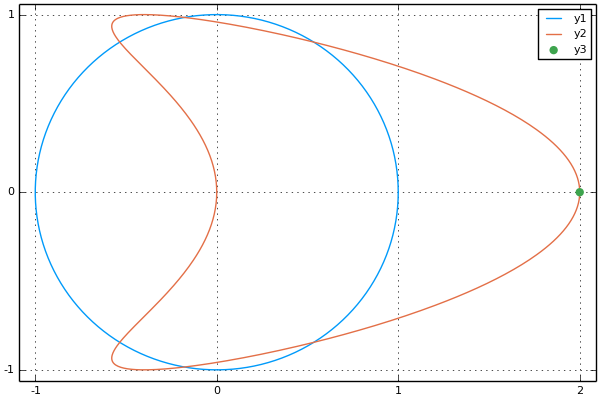

In [126]:
plot(CI1[1, :], CI1[2, :])
plot!(CI2[1, :], CI2[2,:])
#scatter!(rand(1)*4 -2, rand(1)*2 -1, leg=false)
scatter!(G(π/2))

In [128]:
G(3π/2)[1]

0.0

In [121]:
-2.8*sin(t´) + 1

0.0

In [ ]:

dentro = 0
total = 0

for i in 1:10000000
    
    x, y = rand(2)
    r = sqrt(x^2 + y^2)
    total += 1
    
    if r < 1
        
        dentro += 1
        push!(xs, x)
        push!(ys,y)
    
    end
    
end
   
dentro_circulo, total


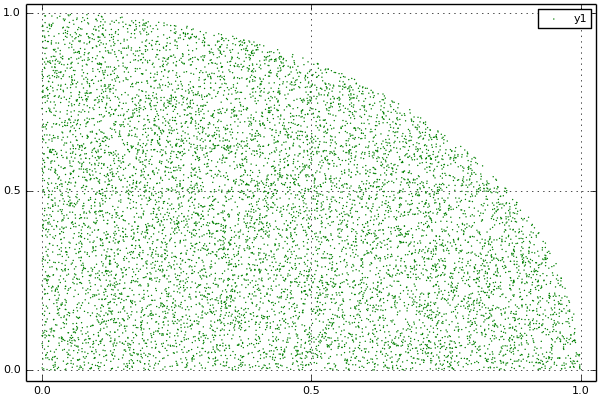

In [17]:
scatter(circulo[1,1:10000], circulo[2,1:10000], markersize=(1), markercolor=:green)

In [12]:
function iterator_paso(f::Function, X0, a, b)
    
    orbit = similar(X0)
    
    for i in 1:length(X0[1, :])
        
        orbit[1, i] = f(X0[1, i], X0[2, i], a, b)[1]
        orbit[2, i] = f(X0[1, i], X0[2, i], a, b)[2]
    
    end
    
    orbit
    
end 

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


iterator_paso (generic function with 1 method)

In [13]:
CI2 = iterator_paso(Henon, CI1, 1.4, 1)
CI3 = iterator_paso(Henon, CI2, 1.4, 1)
CI4 = iterator_paso(Henon, CI3, 1.4, 1)

2×629 Array{Float64,2}:
 -3.81585  -3.86139  -3.90654  -3.95117  …  -3.70946  -3.75542  -3.80128
  1.776     1.78716   1.79823   1.80919      1.7499    1.76118   1.77243


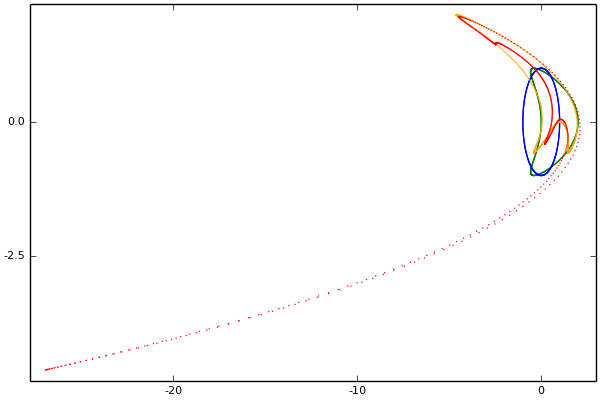

In [14]:
scatter(CI2[1,:], CI2[2,:], markersize=(1), markercolor=:green)
scatter!(CI1[1,:], CI1[2,:], markersize=(1), markercolor=:blue)
scatter!(CI3[1,:], CI3[2,:], markersize=(1), markercolor=:orange, grid=false)
scatter!(CI4[1,:], CI4[2,:], markersize=(1), markercolor=:red, leg=false)

In [15]:
CI2 = iterator_paso(Henon, CI1, 1.4, 0.3)
CI3 = iterator_paso(Henon, CI2, 1.4, 0.3)
CI4 = iterator_paso(Henon, CI3, 1.4, 0.3)

2×629 Array{Float64,2}:
 -0.740886  -0.771756  -0.802828  …  -0.670501  -0.70062   -0.731108
  0.3228     0.326159   0.329512      0.315028   0.318373   0.32173 


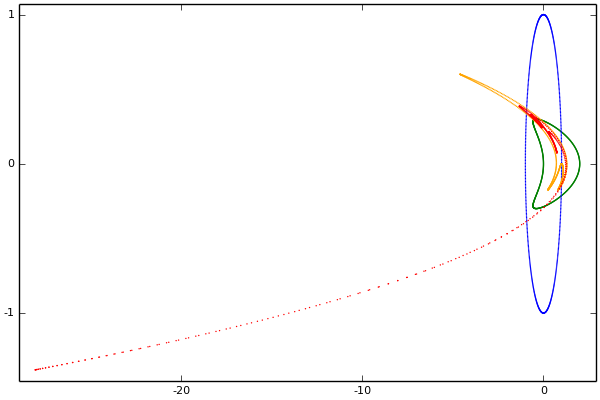

In [16]:
scatter(CI2[1,:], CI2[2,:], markersize=(1), markercolor=:green)
scatter!(CI1[1,:], CI1[2,:], markersize=(1), markercolor=:blue)
scatter!(CI3[1,:], CI3[2,:], markersize=(1), markercolor=:orange, grid=false)
scatter!(CI4[1,:], CI4[2,:], markersize=(1), markercolor=:red, leg=false)

In [17]:
A = rand(20)
A_x = collect(1.0:2.0:40.0)
knots = (A_x,)
itp = interpolate(knots, A, Gridded(Linear()))
itp[2.0] 

0.14908869424414806


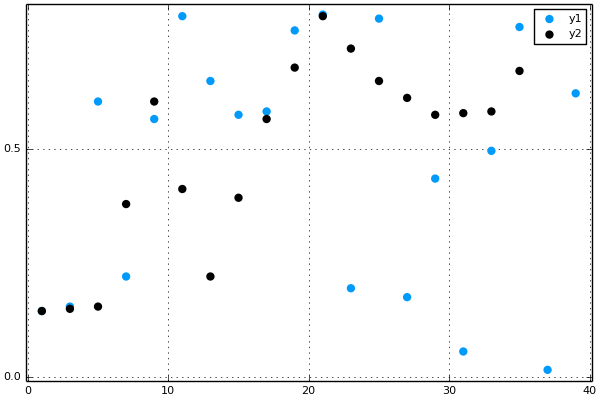

In [23]:
scatter(A_x, A)
scatter!(A_x, itp, color=:black)